In [2]:
import numpy as np
import scanpy as sc
import pertpy as pt
import pandas as pd
import anndata as ad

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [22]:
adata = ad.read_h5ad("../../data/sciplex/sciplex3_uce_adata.h5ad")

In [23]:
def preprocess_adata(adata_copy, cell_type, no_hvg):
    """
    Preprocess adata object using the Ji. et. Al. steps:
    Subsample adata to include only a single cell type, log-normalization, 2000 HVG gene selectio 
    using scanpy with default parameters
    """

    #subsample
    if cell_type is not None:
        adata = adata_copy[adata_copy.obs['cell_type'] == cell_type].copy()
    else:
        adata = adata_copy.copy()
    
    sc.pp.normalize_total(adata, target_sum=1e6, exclude_highly_expressed=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=no_hvg)
    adata = adata[:, adata.var['highly_variable']]
    # sc.pp.pca(adata, use_highly_variable=True)
    # adata.obs_names_make_unique()
    # adata.var_names_make_unique()

    adata.layers["X_hvg"] = adata.X

    return adata

In [24]:
adata_MCF7 = preprocess_adata(adata, "MCF7", 2000)
adata_A549 = preprocess_adata(adata, "A549", 2000)
adata_K562 = preprocess_adata(adata, "K562", 2000)
adata_all = preprocess_adata(adata, None, 2000)

/tmp/ipykernel_1266676/3981567701.py:22: ImplicitModificationWarning: Setting element `.layers['X_hvg']` of view, initializing view as actual.
  adata.layers["X_hvg"] = adata.X
/tmp/ipykernel_1266676/3981567701.py:22: ImplicitModificationWarning: Setting element `.layers['X_hvg']` of view, initializing view as actual.
  adata.layers["X_hvg"] = adata.X
/tmp/ipykernel_1266676/3981567701.py:22: ImplicitModificationWarning: Setting element `.layers['X_hvg']` of view, initializing view as actual.
  adata.layers["X_hvg"] = adata.X
/tmp/ipykernel_1266676/3981567701.py:22: ImplicitModificationWarning: Setting element `.layers['X_hvg']` of view, initializing view as actual.
  adata.layers["X_hvg"] = adata.X


In [25]:
genes_MCF7 = list(adata_MCF7.var_names)
genes_A549 = list(adata_A549.var_names)
genes_K562 = list(adata_K562.var_names)
genes_all = list(adata_all.var_names)

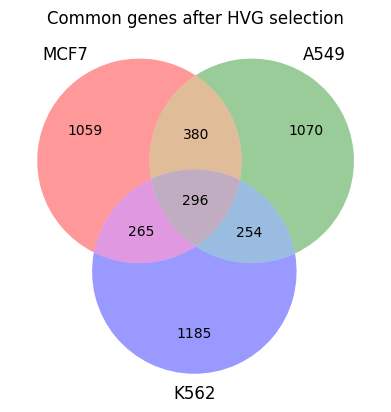

In [26]:
set1 = set(genes_MCF7)
set2 = set(genes_A549)
set3 = set(genes_K562)


venn3([set1, set2, set3], ('MCF7', 'A549', 'K562'))

plt.title("Common genes after HVG selection")
plt.savefig("./output/HVG_overlap_sciplex.png", bbox_inches='tight', dpi=300)
plt.show()

In [3]:
adata = ad.read_h5ad("../../data/sciplex/sciplex3_uce_adata.h5ad")
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e6, exclude_highly_expressed=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.tl.pca(adata)

In [14]:
sc.settings.figdir = "./"

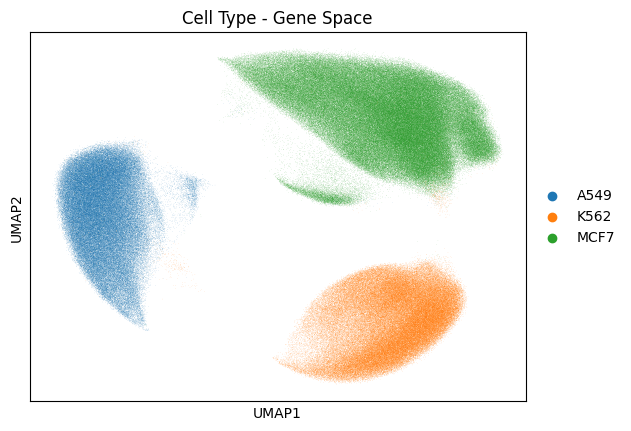

In [17]:
sc.pl.umap(
    adata,
    color=['cell_type'],
    title="Cell Type - Gene Space",
    save="UMAP_celltype_GS_plot.png"
)

In [18]:
adata = ad.read_h5ad("../../data/sciplex/sciplex3_uce_adata.h5ad")
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.neighbors(adata, use_rep="X_uce")
sc.tl.umap(adata)

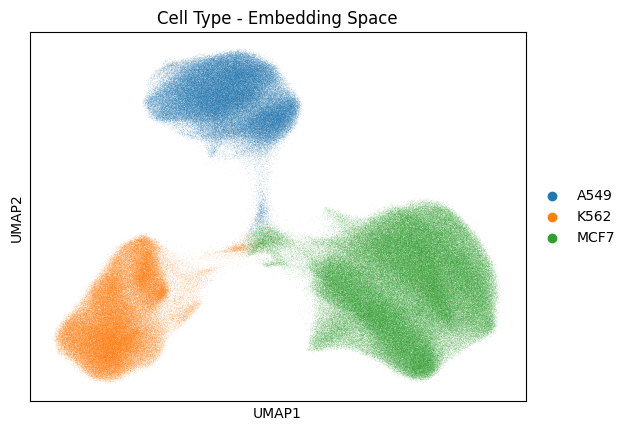

In [19]:
sc.pl.umap(
    adata,
    color=['cell_type'],
    title="Cell Type - Embedding Space",
    save="UMAP_celltype_ES_plot.png"
)